<a href="https://colab.research.google.com/github/ehsung/PUBH6886/blob/main/PUBH6886_RLabs6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUBH 6886: R Lab 06

## Edward Sung

## 10/08/24

# 5.3 - Lab: Cross-Validation and the Bootstrap

>[5.3 - Lab: Cross-Validation and the Bootstrap](#scrollTo=jcgfWerEpyUj)

>>[5.3.1 - The Validation Set Approach](#scrollTo=FdfUFMcwpB0_)

>>[5.3.2 - Leave-One-Out Cross-Validation](#scrollTo=nr5bT4lbq00g)

>>[5.3.3 - k-Fold Cross-Validation](#scrollTo=fXYQ8qIurmph)

>[Lecture 6 - Slides 25-39](#scrollTo=XrpJ0ybzsKPW)

>>[prostate_data](#scrollTo=SD657pzF2O8l)

>>[heart_data](#scrollTo=jsc7ZOgG2R8q)



## 5.3.1 - The Validation Set Approach

In [94]:
install.packages("ISLR2")
library(ISLR2)
set.seed(1)
train <- sample(392, 196)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [95]:
lm.fit <- lm(mpg ~ horsepower , data = Auto , subset = train)

In [96]:
attach(Auto)
mean((mpg - predict(lm.fit , Auto))[-train]^2)

The following object is masked from package:ggplot2:

    mpg


The following objects are masked from Auto (pos = 9):

    acceleration, cylinders, displacement, horsepower, mpg, name,
    origin, weight, year




[1] 23.26601

In [97]:
lm.fit2 <- lm(mpg ~ poly(horsepower, 2), data = Auto, subset = train)
mean((mpg - predict(lm.fit2 , Auto))[-train]^2)

[1] 18.71646

In [98]:
lm.fit3 <- lm(mpg ~ poly(horsepower, 3), data = Auto, subset = train)
mean((mpg - predict(lm.fit3, Auto))[-train]^2)

[1] 18.79401

In [99]:
set.seed(2)
train <- sample(392, 196)
m.fit <- lm(mpg ~ horsepower, subset = train)
mean((mpg - predict(lm.fit, Auto))[-train ]^2)

[1] 25.29277

In [100]:
lm.fit2 <- lm(mpg ~ poly(horsepower, 2), data = Auto, subset = train)
mean((mpg - predict(lm.fit2, Auto))[-train ]^2)

[1] 20.43036

In [101]:
lm.fit3 <- lm(mpg ~ poly(horsepower, 3), data = Auto ,
subset = train)
mean((mpg - predict(lm.fit3, Auto))[-train]^2)

[1] 20.38533

## 5.3.2 - Leave-One-Out Cross-Validation

In [102]:
glm.fit <- glm(mpg ~ horsepower, data = Auto)
coef(glm.fit)

(Intercept)  horsepower 
 39.9358610  -0.1578447

In [103]:
lm.fit <- lm(mpg ~ horsepower, data = Auto)
coef(lm.fit)

(Intercept)  horsepower 
 39.9358610  -0.1578447

In [104]:
library(boot)
glm.fit <- glm(mpg ~ horsepower, data = Auto)
cv.err <- cv.glm(Auto, glm.fit)
cv.err$delta

[1] 24.23151 24.23114

In [105]:
cv.error <- rep(0, 10)
for (i in 1:10) {
  glm.fit <- glm(mpg ~ poly(horsepower, i), data = Auto)
  cv.error[i] <- cv.glm(Auto, glm.fit)$delta[1]
  }

cv.error

[1] 24.23151 19.24821 19.33498 19.42443 19.03321 18.97864 18.83305 18.96115
 [9] 19.06863 19.49093

## 5.3.3 - k-Fold Cross-Validation

In [106]:
set.seed(17)
cv.error.10 <- rep(0, 10)
for (i in 1:10) {
  glm.fit <- glm(mpg ~ poly(horsepower , i), data = Auto)
  cv.error.10[i] <- cv.glm(Auto , glm.fit , K = 10)$delta[1]
  }

cv.error.10

[1] 24.27207 19.26909 19.34805 19.29496 19.03198 18.89781 19.12061 19.14666
 [9] 18.87013 20.95520

# Lecture 6 - Slides 25-39

In [107]:
# Install Libraries
install.packages("caret")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [108]:
# Libraries
library(readr)
library(caret)
library(dplyr)
library(ggplot2)

## prostate_data

In [109]:
# data set for psa prediction models
prostate_data <- read_csv("/content/prostate_data.csv", show_col_types = FALSE)
# dimension of the data set
dim(prostate_data)

[1] 97 10

In [110]:
# look at first few rows of prostate_data
head(prostate_data)

lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
-0.5798185,2.769459,50,-1.386294,0,-1.386294,6,0,-0.4307829,TRUE
-0.9942523,3.319626,58,-1.386294,0,-1.386294,6,0,-0.1625189,TRUE
-0.5108256,2.691243,74,-1.386294,0,-1.386294,7,20,-0.1625189,TRUE
-1.2039728,3.282789,58,-1.386294,0,-1.386294,6,0,-0.1625189,TRUE
0.7514161,3.432373,62,-1.386294,0,-1.386294,6,0,0.3715636,TRUE
-1.0498221,3.228826,50,-1.386294,0,-1.386294,6,0,0.7654678,TRUE


In [111]:
lm_lpsa_loocv <- suppressWarnings(train(x = prostate_data[,1:8], y = prostate_data$lpsa, method = "lm", trControl = trainControl(method = "LOOCV")))

lm_lpsa_loocv

Linear Regression 

97 samples
 8 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 96, 96, 96, 96, 96, 96, ... 
Resampling results:

  RMSE       Rsquared  MAE      
  0.7357507  0.591976  0.5573323

Tuning parameter 'intercept' was held constant at a value of TRUE

In [112]:
# pick off RMSE and square to get estimate of test MSE
lm_lpsa_loocv$results$RMSE^2

[1] 0.5413291

In [113]:
# can pick off information about model fitted to entire data set
# the object below is an lm object (fitted to all 97 observations)
lm_lpsa_loocv$finalModel


Call:
lm(formula = .outcome ~ ., data = dat)

Coefficients:
(Intercept)       lcavol      lweight          age         lbph          svi  
   0.181561     0.564341     0.622020    -0.021248     0.096713     0.761673  
        lcp      gleason        pgg45  
  -0.106051     0.049228     0.004458  


In [114]:
# set up the tuneGrid object
tg_01 <- data.frame(k = 1:20)

# set seed (for reproducibility) and obtain LOOCV measures for each model
set.seed(1234)
knn20_lpsa_loocv <- suppressWarnings(train(x = prostate_data[,1:8],
  y = prostate_data$lpsa,
  method = "knn",
  trControl = trainControl(method = "LOOCV"),
  tuneGrid = tg_01))

knn20_lpsa_loocv

k-Nearest Neighbors 

97 samples
 8 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 96, 96, 96, 96, 96, 96, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE      
   1  1.299602  0.1453803  0.9767271
   2  1.196398  0.1549915  0.9201398
   3  1.136676  0.1503936  0.8931937
   4  1.105338  0.1602263  0.8587658
   5  1.085584  0.1688127  0.8330246
   6  1.080900  0.1623791  0.8347545
   7  1.074900  0.1711441  0.8299665
   8  1.058084  0.1814229  0.8114736
   9  1.044822  0.1939973  0.7913612
  10  1.038327  0.2000895  0.7886105
  11  1.049848  0.1864721  0.7939264
  12  1.049086  0.1875993  0.7988016
  13  1.040135  0.1958307  0.7963214
  14  1.030857  0.2081088  0.7920424
  15  1.040122  0.1956275  0.7938970
  16  1.056455  0.1738153  0.8059622
  17  1.057689  0.1700175  0.8037267
  18  1.056052  0.1712676  0.7986589
  19  1.055994  0.1713088  0.7937933
  20  1.041190  0.1888010  0.7824015

RMSE was used

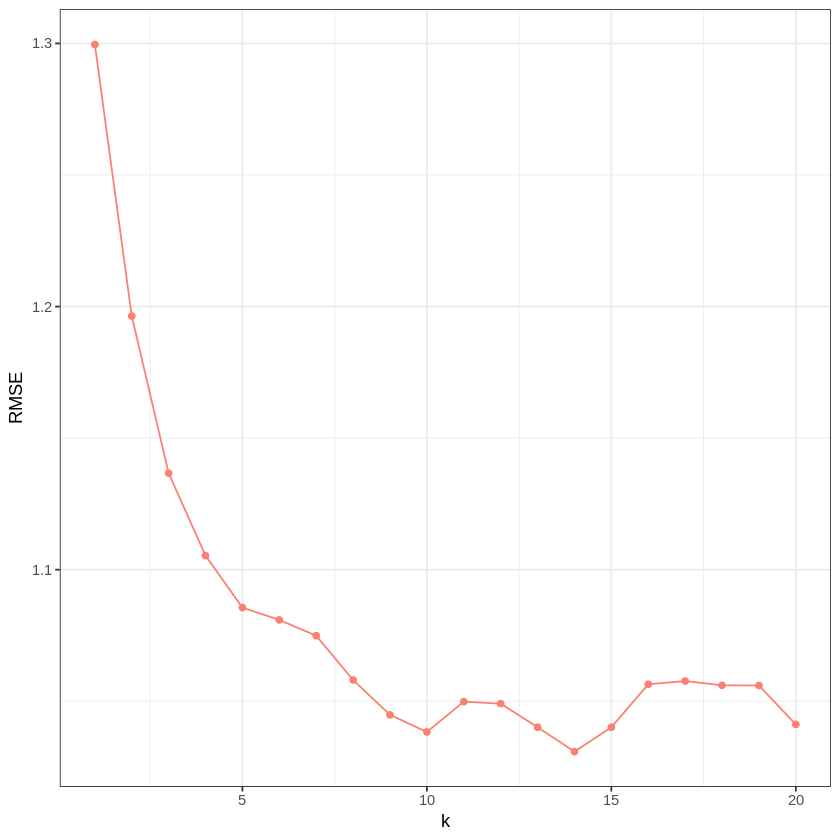

In [115]:
knn20_lpsa_loocv$results %>%
  ggplot(aes(x = k, y = RMSE)) +
  geom_point(col = "salmon") +
  geom_line(col = "salmon") +
  theme_bw()

In [116]:
knn20_lpsa_loocv$finalModel

14-nearest neighbor regression model

In [117]:
# set seed (for reproducibility) and obtain 10-fold CV error for the linear model
set.seed(12345)

lm_lpsa_10cv <- suppressWarnings(train(x = prostate_data[,1:8], y = prostate_data$lpsa,
method = "lm", trControl = trainControl(method = "cv", number = 10)))

lm_lpsa_10cv

Linear Regression 

97 samples
 8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 87, 87, 86, 88, 87, 87, ... 
Resampling results:

  RMSE      Rsquared   MAE      
  0.719887  0.6699834  0.5630662

Tuning parameter 'intercept' was held constant at a value of TRUE

In [118]:
# set seed (for reproducibility) and obtain 10-fold CV error for each model
set.seed(12345)

knn20_lpsa_10cv <- suppressWarnings(train(x = prostate_data[,1:8], y = prostate_data$lpsa,
method = "knn", trControl = trainControl(method = "cv", number = 10),
tuneGrid = tg_01))

knn20_lpsa_10cv

k-Nearest Neighbors 

97 samples
 8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 87, 87, 86, 88, 87, 87, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE      
   1  1.2425685  0.2910317  1.0007210
   2  1.1515293  0.2583895  0.9167156
   3  1.1140353  0.2122385  0.9098689
   4  1.0773898  0.2331635  0.8660722
   5  1.0661972  0.2602633  0.8664271
   6  1.0373570  0.2626635  0.8409641
   7  1.0268380  0.2668873  0.8258085
   8  1.0033104  0.2907916  0.8050998
   9  0.9998212  0.3106420  0.7878185
  10  0.9926295  0.3033387  0.7909425
  11  1.0053303  0.2819859  0.8080868
  12  0.9998802  0.2849951  0.8054119
  13  0.9938388  0.2988811  0.7989707
  14  0.9857397  0.3175317  0.7953058
  15  0.9924162  0.3091931  0.7999174
  16  0.9961486  0.3119749  0.8031246
  17  0.9871293  0.3180132  0.7944415
  18  0.9756084  0.3269071  0.7807331
  19  0.9727598  0.3294804  0.7764059
  20  0.9723691  0.3293222  0.775672

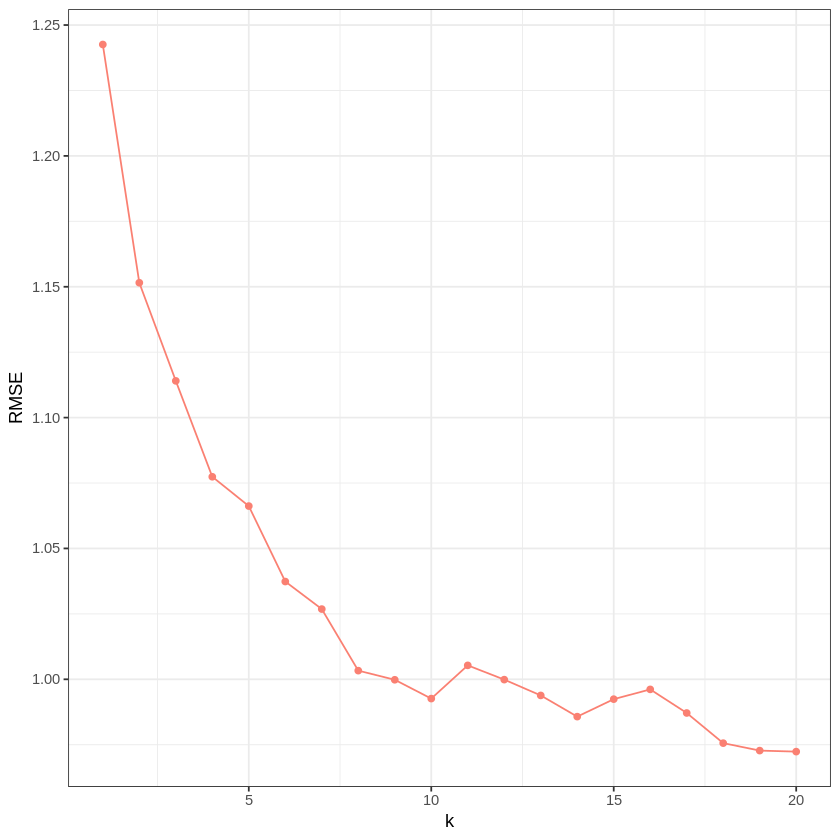

In [119]:
knn20_lpsa_10cv$results %>%
  ggplot(aes(x = k, y = RMSE)) +
  geom_point(col = "salmon") +
  geom_line(col = "salmon") +
  theme_bw()

## heart_data

In [120]:
# data set for heart disease prediction models
heart_data <- read_csv("/content/Heart.csv", show_col_types = FALSE)

# convert Sex, ChestPain, Fbs, RestECG, ExAng, Slope, and Thal to factor variables
heart_data$Sex <- factor(heart_data$Sex)
heart_data$ChestPain <- factor(heart_data$ChestPain)
heart_data$Fbs <- factor(heart_data$Fbs)
heart_data$RestECG <- factor(heart_data$RestECG)
heart_data$ExAng <- factor(heart_data$ExAng)
heart_data$Slope <- factor(heart_data$Slope)
heart_data$Thal <- factor(heart_data$Thal)

# look at first few rows of prostate_data
head(heart_data)

Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>
63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No
56,1,nontypical,120,236,0,0,178,0,0.8,1,0,normal,No


In [121]:
# look at distribution of response
table(heart_data$AHD)


 No Yes 
164 139 

In [122]:
set.seed(1234)

lr_heart_10cv_1 <- suppressWarnings(train(x = heart_data[,1:13], y = heart_data$AHD,
method = "glm", family = binomial(link = "logit"),
trControl = trainControl(method = "cv", number = 10,
classProbs = TRUE, savePredictions = TRUE)))

lr_heart_10cv_1

Generalized Linear Model 

303 samples
 13 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 272, 273, 272, 272, 273, 273, ... 
Resampling results:

  Accuracy   Kappa    
  0.8244457  0.6457533


In [123]:
set.seed(1234)

lr_heart_10cv_2 <- suppressWarnings(train(x = heart_data[,1:13], y = heart_data$AHD,
method = "glm", family = binomial(link = "logit"),
trControl = trainControl(method = "cv", number = 10,
summaryFunction = twoClassSummary,
classProbs = TRUE, savePredictions = TRUE)))

lr_heart_10cv_2

Generalized Linear Model 

303 samples
 13 predictor
  2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 272, 273, 272, 272, 273, 273, ... 
Resampling results:

  ROC        Sens       Spec     
  0.8890459  0.8622549  0.7818681


In [124]:
# first, provide a sequence of threshold values
prob_thresh <- seq(0.10, 0.90, by = 0.10)
prob_thresh

[1] 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9

In [125]:
# use thresholder() function to obtain accuracy measures at each threshold
lr_heart_ths <- thresholder(lr_heart_10cv_2,
threshold = prob_thresh,
final = TRUE,
statistics = c("Sensitivity", "Specificity", "Accuracy", "Kappa")) # also try "all"

lr_heart_ths

parameter,prob_threshold,Sensitivity,Specificity,Accuracy,Kappa
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
none,0.1,0.9632353,0.5263736,0.7605376,0.5037681
none,0.2,0.9511029,0.6197802,0.7976567,0.5828195
none,0.3,0.9264216,0.6928571,0.8180015,0.6270403
none,0.4,0.9076716,0.7313187,0.8248980,0.6437943
none,0.5,0.8622549,0.7818681,0.8244457,0.6457533
none,0.6,0.8188235,0.8258242,0.8214498,0.6421778
none,0.7,0.7436765,0.8472527,0.7914423,0.5850851
none,0.8,0.6302451,0.8989011,0.7543085,0.5165586
none,0.9,0.4890686,0.9637363,0.7075195,0.4355522
